In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2, fftshift, ifftshift

In [13]:
# Step 1: Read the image
image = Image.open('images/FFTinputimage.jfif').convert('L')  # Convert to grayscale
image_array = np.array(image)

In [14]:
# Step 2: Apply FFT
fft_image = fft2(image_array)
fft_shifted = fftshift(fft_image)

In [15]:
# Remove high frequency components
rows, cols = image_array.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 30  # Radius of the low-pass filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

In [16]:
# Apply mask to the shifted FFT      # the mask which we get after fft (e raise to wala) is applied 
fft_shifted_filtered = fft_shifted * mask

In [17]:
# Step 3: Apply inverse FFT
ifft_shifted = ifftshift(fft_shifted_filtered)
image_filtered = ifft2(ifft_shifted)
image_filtered = np.abs(image_filtered)

In [18]:
# Step 4: Write the image
filtered_image = Image.fromarray(np.uint8(image_filtered))
filtered_image.save('outputFFT_image.jpg')

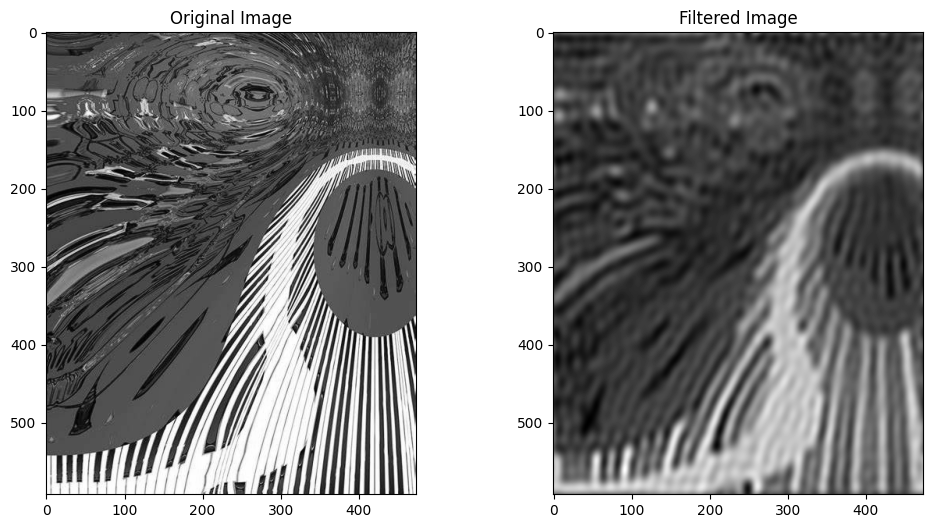

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [23]:
# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_array, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_filtered, cmap='gray'), plt.title('Filtered Image')
plt.show()

#Write 
cv2.imwrite('Filtered_image_FFT.jpg', filtered_image)

Displaying the Spectrum

In [10]:
# Apply FFT
fft_image = fft2(image_array)
fft_shifted = fftshift(fft_image)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fft_shifted))

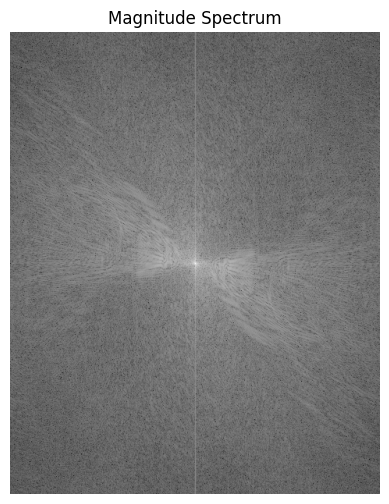

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [20]:
# Display the spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

#Write 
cv2.imwrite('Magnitude_spectrum_FFT.jpg', image)

Reconstructing the image

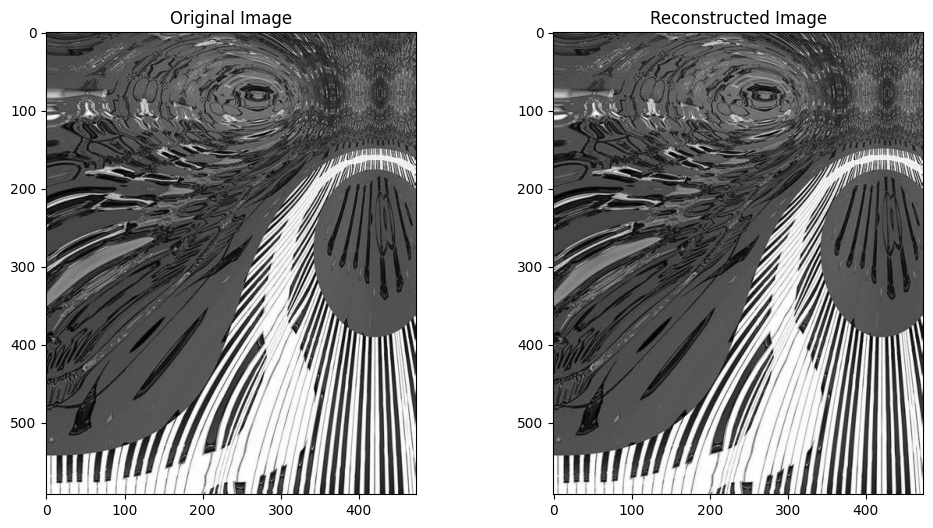

In [11]:
# Inverse FFT to reconstruct the image
ifft_shifted = ifftshift(fft_shifted)
image_reconstructed = ifft2(ifft_shifted)
image_reconstructed = np.abs(image_reconstructed)

# Convert to uint8 and save the image
reconstructed_image = Image.fromarray(np.uint8(image_reconstructed))
reconstructed_image.save('reconstructed_image.jpg')

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_array, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_reconstructed, cmap='gray'), plt.title('Reconstructed Image')
plt.show()